In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
!pip install scikit-plot
import scikitplot as skplt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
df = pd.read_csv('obesity.csv')

In [44]:
df.head(10)

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   
5    Male  29.0    1.62    53.0                             no  yes   2.0   
6  Female  23.0    1.50    55.0                            yes  yes   3.0   
7    Male  22.0    1.64    53.0                             no   no   2.0   
8    Male  24.0    1.78    64.0                            yes  yes   3.0   
9    Male  22.0    1.72    68.0                            yes  yes   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
5  3.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
6  3.0  Sometimes    no   2.0   no  1.0  0.0   Sometimes   
7  3.0  Sometimes    no   2.0   no  3.0  0.0   Sometimes   
8  3.0  Sometimes    no   2.0   no  1.0  1.0  Frequently   
9  3.0  Sometimes    no   2.0   no  1.0  1.0          no   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II  
5             Automobile        Normal_Weight  
6              Motorbike        Normal_Weight  
7  Public_Transportation        Normal_Weight  
8  Public_Transportation        Normal_Weight  
9  Public_Transportation        Normal_Weight

In [45]:
df['BMI'] = df['Weight']/(df['Height']) ** 2

In [46]:
"""
Gender	Sex of the individual
Age	Age of the individual
Height of the Individual	Height in meter
Family History for Obesity	If the family have prior history of obesity
FAVC in Obesity	Caloric Food consumption frequency
FCVC in Obesity	Vegetable Consumption Frequency
NCP in Obesity	No of Main Meals
CAEC in Obesity	Food consumption in between meals
SMOKE in Obesity	exercise induced angina (1 = yes; 0 = no)
CH2O in Obesity	Water use on a daily basis
SCC in Obesity	squamous cell carcinoma
FAF in Obesity	Physical Activity Frequency
TUE in Obesity	Therapeutic Use Exceptions
CALC in Obesity	Consumption of alcohol
MTRANS in Obesity	
Obesity level	7 Levels
"""

'\nGender\tSex of the individual\nAge\tAge of the individual\nHeight of the Individual\tHeight in meter\nFamily History for Obesity\tIf the family have prior history of obesity\nFAVC in Obesity\tCaloric Food consumption frequency\nFCVC in Obesity\tVegetable Consumption Frequency\nNCP in Obesity\tNo of Main Meals\nCAEC in Obesity\tFood consumption in between meals\nSMOKE in Obesity\texercise induced angina (1 = yes; 0 = no)\nCH2O in Obesity\tWater use on a daily basis\nSCC in Obesity\tsquamous cell carcinoma\nFAF in Obesity\tPhysical Activity Frequency\nTUE in Obesity\tTherapeutic Use Exceptions\nCALC in Obesity\tConsumption of alcohol\nMTRANS in Obesity\t\nObesity level\t7 Levels\n'

In [47]:
#Number of null values in the dataset
df.isnull()

Gender    Age  Height  Weight  family_history_with_overweight   FAVC  \
0      False  False   False   False                           False  False   
1      False  False   False   False                           False  False   
2      False  False   False   False                           False  False   
3      False  False   False   False                           False  False   
4      False  False   False   False                           False  False   
...      ...    ...     ...     ...                             ...    ...   
2106   False  False   False   False                           False  False   
2107   False  False   False   False                           False  False   
2108   False  False   False   False                           False  False   
2109   False  False   False   False                           False  False   
2110   False  False   False   False                           False  False   

       FCVC    NCP   CAEC  SMOKE   CH2O    SCC    FAF    TUE   CALC  MTRANS  \
0     False  False  False  False  False  False  False  False  False   False   
1     False  False  False  False  False  False  False  False  False   False   
2     False  False  False  False  False  False  False  False  False   False   
3     False  False  False  False  False  False  False  False  False   False   
4     False  False  False  False  False  False  False  False  False   False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
2106  False  False  False  False  False  False  False  False  False   False   
2107  False  False  False  False  False  False  False  False  False   False   
2108  False  False  False  False  False  False  False  False  False   False   
2109  False  False  False  False  False  False  False  False  False   False   
2110  False  False  False  False  False  False  False  False  False   False   

      NObeyesdad    BMI  
0          False  False  
1          False  False  
2          False  False  
3          False  False  
4          False  False  
...          ...    ...  
2106       False  False  
2107       False  False  
2108       False  False  
2109       False  False  
2110       False  False  

[2111 rows x 18 columns]

In [48]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
BMI                               float64
dtype: object

In [49]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64

In [50]:
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE          BMI  
count  2111.000000  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866    29.700159  
std       0.612953     0.850592     0.608927     8.011337  
min       1.000000     0.000000     0.000000    12.998685  
25%       1.584812     0.124505     0.000000    24.325802  
50%       2.000000     1.000000     0.625350    28.719089  
75%       2.477420     1.666678     1.000000    36.016501  
max       3.000000     3.000000     2.000000    50.811753

# plotting

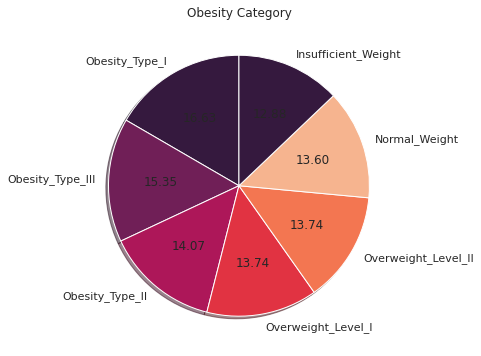

In [51]:
values = df['NObeyesdad'].value_counts().values
labels = ["Obesity_Type_I",'Obesity_Type_III','Obesity_Type_II','Overweight_Level_I','Overweight_Level_II','Normal_Weight','Insufficient_Weight']

fig1, ax1 = plt.subplots(figsize=[10,6])
colors = sns.color_palette('rocket')
ax1.pie(values, labels=labels, autopct="%.2f",shadow=True,startangle=90,colors=colors)
plt.title('Obesity Category')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


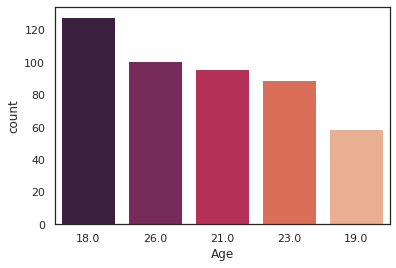

In [52]:
#Age Variable distribution

sns.countplot(df['Age'], palette="rocket",
              order=df.Age.value_counts().sort_values(ascending=False).iloc[:5].index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


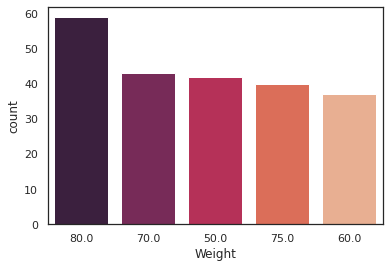

In [53]:
#Weight Variable distribution
sns.countplot(df['Weight'], palette="rocket",
              order=df.Weight.value_counts().sort_values(ascending=False).iloc[:5].index)
sns.set(font_scale=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


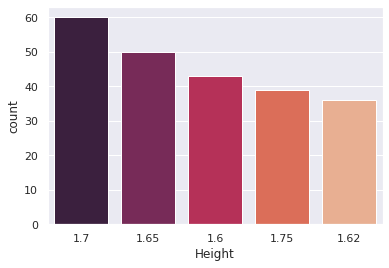

In [54]:
#Height Variable distribution
sns.countplot(df['Height'], palette="rocket",
              order=df.Height.value_counts().sort_values(ascending=False).iloc[:5].index)
sns.set(font_scale=1)

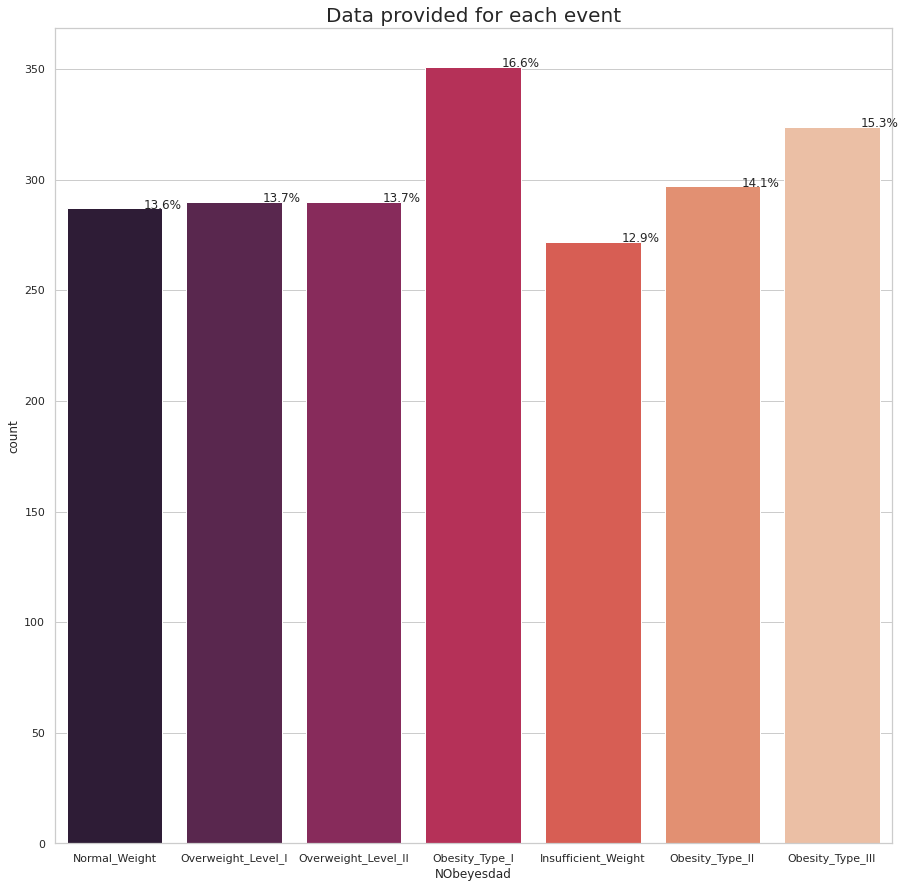

In [55]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,15))
total = float(len(df))
ax = sns.countplot(x="NObeyesdad", data=df,palette='rocket')
plt.title('Data provided for each event', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

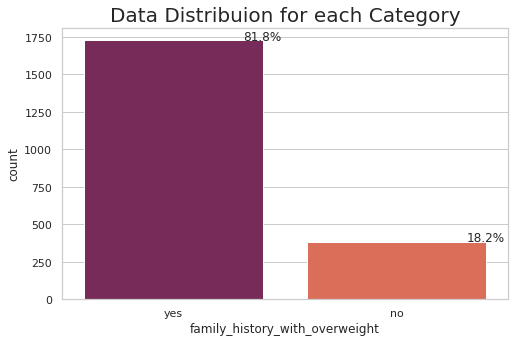

In [56]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="family_history_with_overweight", data=df,palette='rocket')
plt.title('Data Distribuion for each Category', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

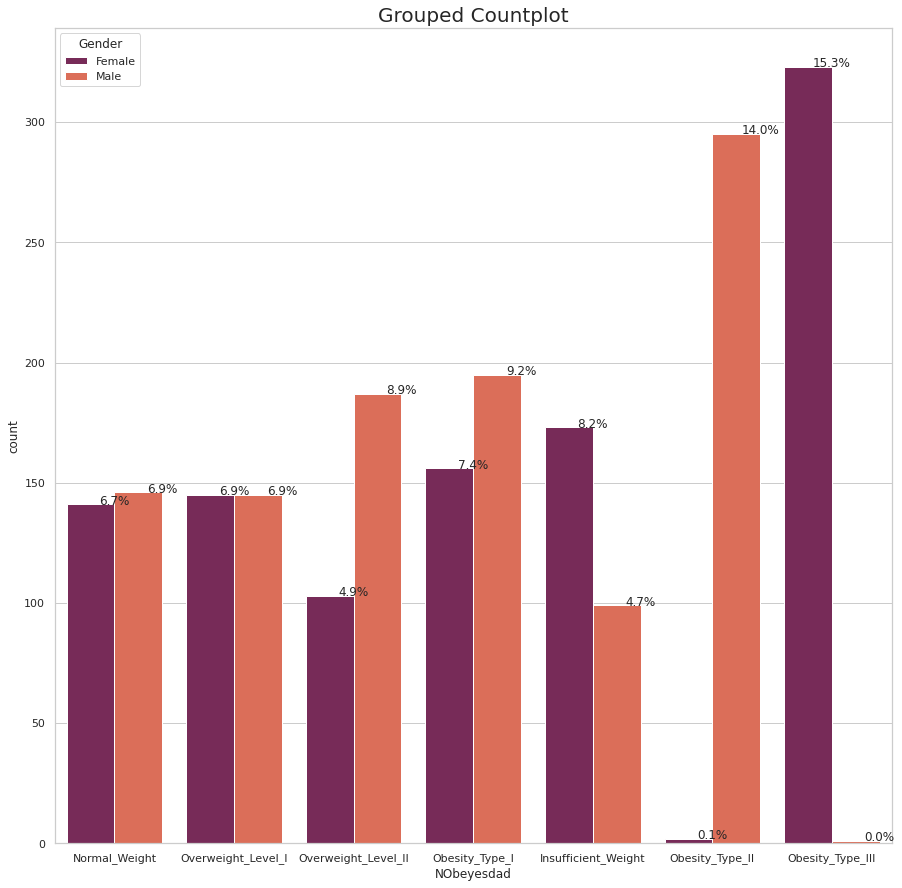

In [57]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,15))
total = float(len(df))
ax = sns.countplot(x="NObeyesdad", data=df,palette='rocket', hue='Gender')
plt.title('Grouped Countplot', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

<Figure size 1296x720 with 0 Axes>

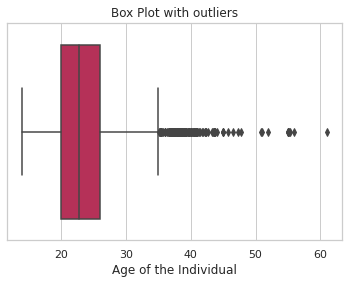

<Figure size 1296x720 with 0 Axes>

In [58]:
sns.boxplot(x = df['Age'], palette='rocket');
plt.xlabel("Age of the Individual")
plt.title("Box Plot with outliers")
plt.figure(figsize=(18,10))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age of Individuals')

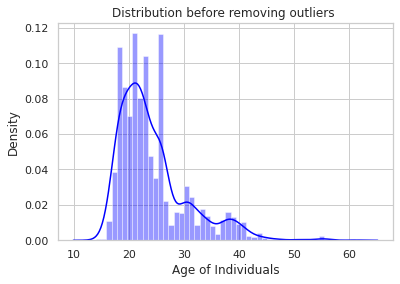

In [59]:
sns.distplot(df['Age'] , color="blue")
plt.title("Distribution before removing outliers ")
plt.xlabel("Age of Individuals")

In [60]:
qtr1 = pd.DataFrame(df['Age']).quantile(0.25)[0]
qtr3 = pd.DataFrame(df['Age']).quantile(0.75)[0]
iqr = qtr3 - qtr1 
print(iqr)

upper_fence = qtr3 + (1.5*iqr)
lower_fence = qtr1 - (1.5*iqr)

print(upper_fence, ' ' , lower_fence)

6.052807999999999
35.079212   10.867980000000003


In [61]:
new_df = df[(df['Age'] < 35.079212) & (df['Age'] > 10.867)]
new_df.describe()

Age       Height       Weight         FCVC          NCP  \
count  1943.000000  1943.000000  1943.000000  1943.000000  1943.000000   
mean     22.944564     1.705268    86.650365     2.425839     2.693926   
std       4.305353     0.092362    26.868368     0.544321     0.778371   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.635551     1.632939    65.000000     2.000000     2.675779   
50%      22.000000     1.703259    83.414072     2.427700     3.000000   
75%      25.902283     1.770638   108.355733     3.000000     3.000000   
max      35.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE          BMI  
count  1943.000000  1943.000000  1943.000000  1943.000000  
mean      2.019028     1.025223     0.695479    29.589850  
std       0.611654     0.845644     0.608428     8.252737  
min       1.000000     0.000000     0.000000    12.998685  
25%       1.616869     0.157417     0.043342    23.718565  
50%       2.000000     1.000000     0.682128    28.363010  
75%       2.495897     1.682381     1.000000    36.153747  
max       3.000000     3.000000     2.000000    50.811753

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age of Individuals')

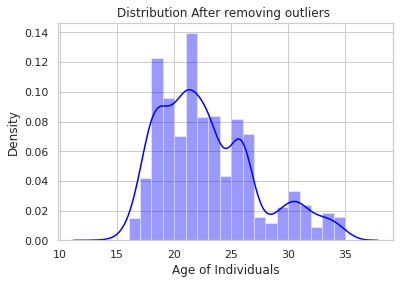

In [62]:
sns.distplot(new_df['Age'] , color="blue")
plt.title("Distribution After removing outliers ")
plt.xlabel("Age of Individuals")

In [63]:
new_df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad        BMI  
0             no  Public_Transportation        Normal_Weight  24.386526  
1      Sometimes  Public_Transportation        Normal_Weight  24.238227  
2     Frequently  Public_Transportation        Normal_Weight  23.765432  
3     Frequently                Walking   Overweight_Level_I  26.851852  
4      Sometimes  Public_Transportation  Overweight_Level_II  28.342381  
...          ...                    ...                  ...        ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  44.901475  
2107   Sometimes  Public_Transportation     Obesity_Type_III  43.741923  
2108   Sometimes  Public_Transportation     Obesity_Type_III  43.543817  
2109   Sometimes  Public_Transportation     Obesity_Type_III  44.071535  
2110   Sometimes  Public_Transportation     Obesity_Type_III  44.144338  

[1943 rows x 18 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


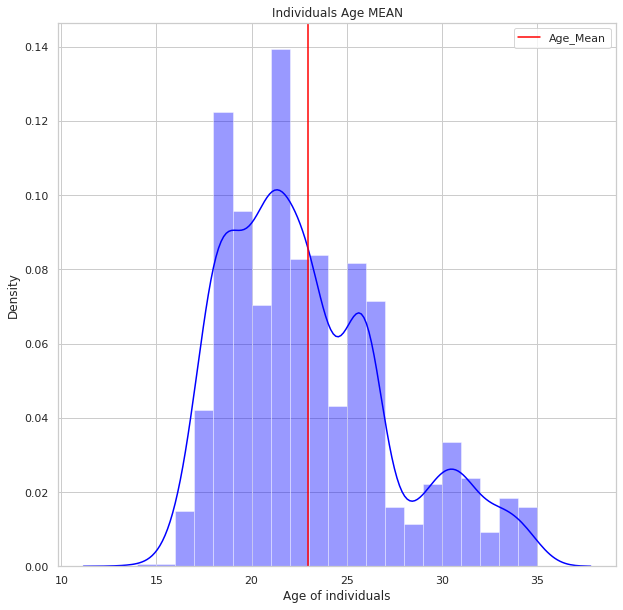

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style("white")

sns.distplot(new_df['Age'],color ='blue' , ax=ax );
plt.axvline(new_df['Age'].mean(), color = 'red', linestyle = 'solid', label = 'Age_Mean')
plt.xlabel("Age of individuals");
plt.title("Individuals Age MEAN");
plt.legend(); 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Weight')

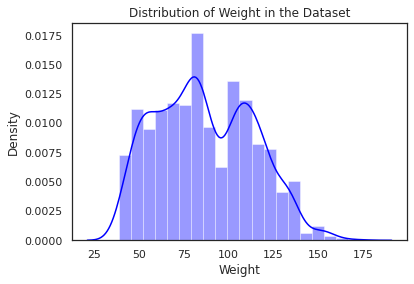

In [65]:
sns.distplot(new_df['Weight'],color = 'blue')
plt.title("Distribution of Weight in the Dataset")
plt.xlabel("Weight")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Height in Meters')

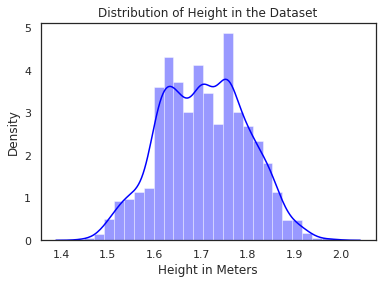

In [66]:
sns.distplot(new_df['Height'],color = 'blue')
plt.title("Distribution of Height in the Dataset")
plt.xlabel("Height in Meters")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


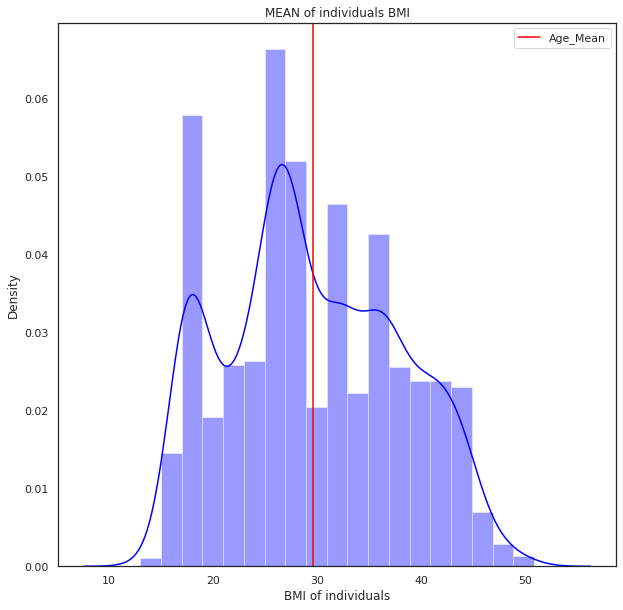

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style("white")

sns.distplot(new_df['BMI'],color ='blue' , ax=ax );
plt.axvline(new_df['BMI'].mean(), color = 'red', linestyle = 'solid', label = 'Age_Mean')
plt.xlabel("BMI of individuals");
plt.title("MEAN of individuals BMI");
plt.legend(); 
plt.show()

In [68]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [69]:
label = LabelEncoder()  
new_df['Gender'] = label.fit_transform(new_df['Gender'])
new_df['family_history_with_overweight'] = label.fit_transform(new_df['family_history_with_overweight'])
new_df['FAVC'] = label.fit_transform(new_df['FAVC'])
new_df['CAEC'] = label.fit_transform(new_df['CAEC'])
new_df['SMOKE'] = label.fit_transform(new_df['SMOKE'])
new_df['SCC'] = label.fit_transform(new_df['SCC'])
new_df['CALC'] = label.fit_transform(new_df['CALC'])
new_df['MTRANS'] = label.fit_transform(new_df['MTRANS'])
new_df['NObeyesdad'] = label.fit_transform(new_df['NObeyesdad'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

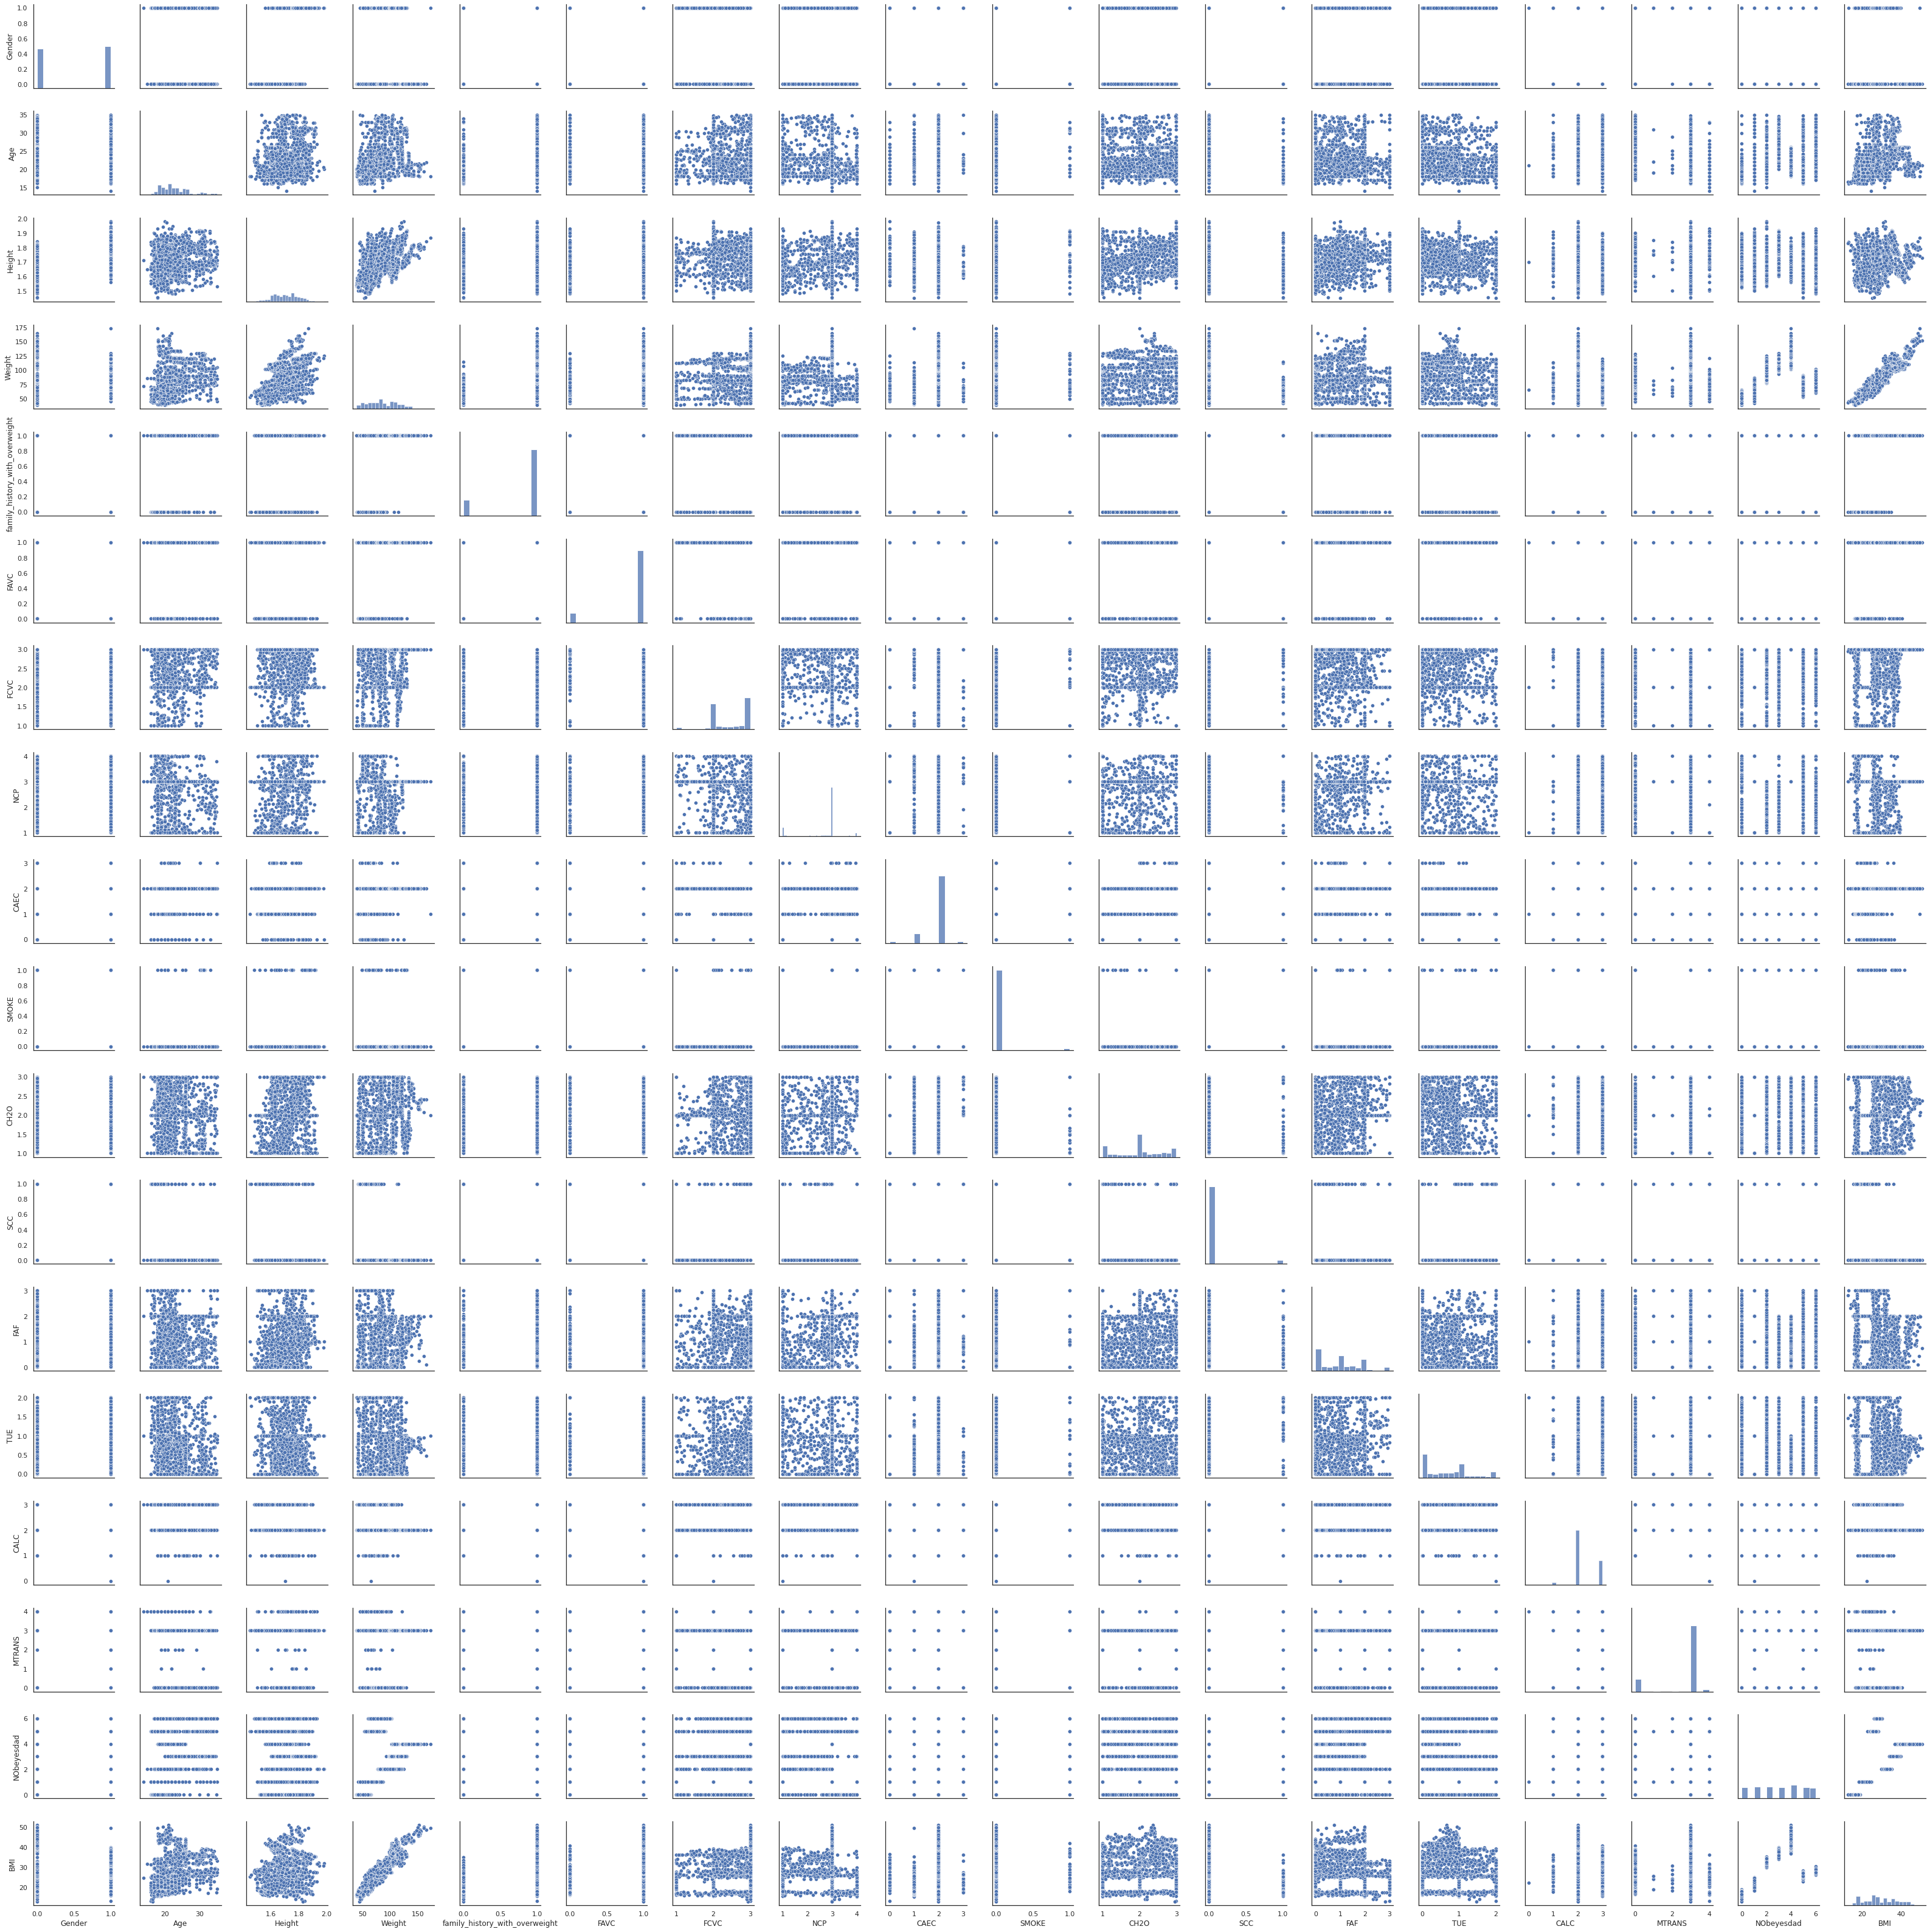

In [70]:
sns.pairplot(new_df)

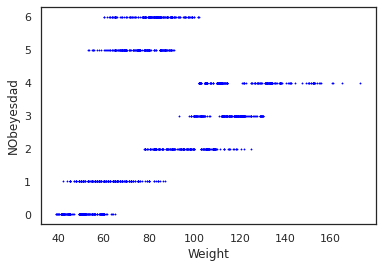

In [87]:
plt.scatter('Weight', 'NObeyesdad' ,data=new_df , marker='*' ,  color='BLUE',s = 1)
plt.xlabel('Weight')
plt.ylabel('NObeyesdad')
plt.show()

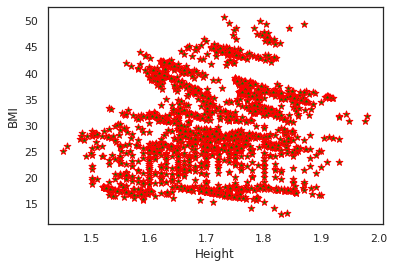

In [88]:
plt.scatter('Height', 'BMI' ,data=new_df , marker='*' ,  color='green',edgecolor='red',s = 50.0 )
plt.xlabel('Height')
plt.ylabel('BMI')
plt.show()

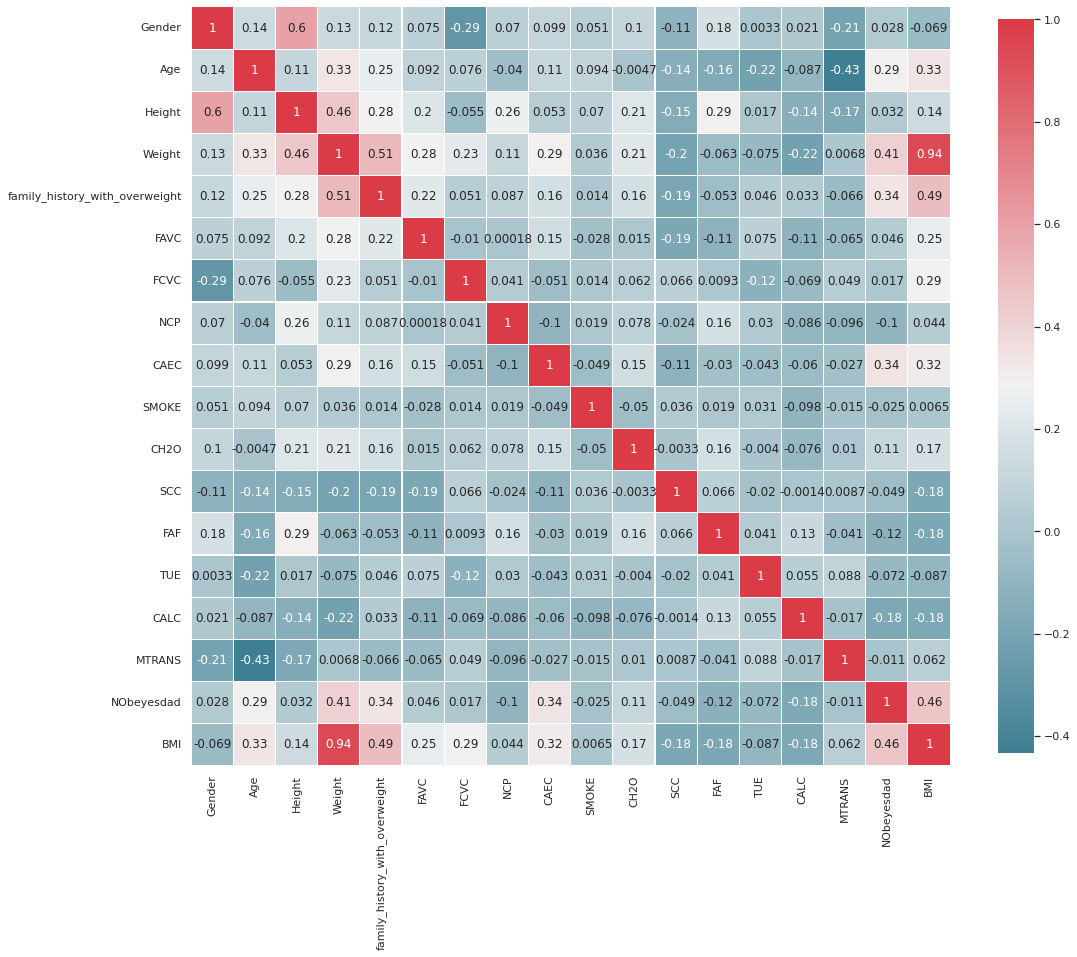

In [77]:
colormap = sns.diverging_palette(220, 10, as_cmap = True)
c = new_df.corr()
 
plt.figure(figsize=(17,15))    
sns.heatmap(
        c, 
        
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
plt.show()

In [74]:
le_name_mapping = dict(zip(label.classes_, label.transform(label.classes_)))
print(le_name_mapping)

{'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


In [75]:
new_df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad        BMI  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  24.386526  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  24.238227  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  23.765432  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  26.851852  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  28.342381

In [76]:
new_df.dtypes

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
NObeyesdad                          int64
BMI                               float64
dtype: object

In [344]:
target = new_df['NObeyesdad']

In [345]:
X = new_df.drop(['NObeyesdad'], axis=1)
y = new_df['NObeyesdad']
X.shape, y.shape

((1943, 17), (1943,))

In [346]:
X.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS        BMI  
0  3.0     2      0   2.0    0  0.0  1.0     3       3  24.386526  
1  3.0     2      1   3.0    1  3.0  0.0     2       3  24.238227  
2  3.0     2      0   2.0    0  2.0  1.0     1       3  23.765432  
3  3.0     2      0   2.0    0  2.0  0.0     1       4  26.851852  
4  1.0     2      0   2.0    0  0.0  0.0     2       3  28.342381

In [347]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [348]:
print(model.feature_importances_)

[0.07199296 0.05154374 0.04587331 0.18496043 0.03552933 0.02174121
 0.05903323 0.03867563 0.0281017  0.00270296 0.02535761 0.00924731
 0.02547021 0.02810663 0.0372499  0.02435343 0.31006042]


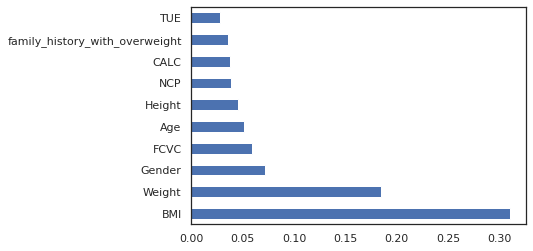

In [349]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [350]:
#train test split function
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

In [351]:
len(X_train)

1301

In [352]:
len(X_test)

642

In [353]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# transforming "train_x"
X_train = sc.fit_transform(X_train)
# transforming "test_x"
X_test = sc.transform(X_test)

In [354]:
X.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS        BMI  
0  3.0     2      0   2.0    0  0.0  1.0     3       3  24.386526  
1  3.0     2      1   3.0    1  3.0  0.0     2       3  24.238227  
2  3.0     2      0   2.0    0  2.0  1.0     1       3  23.765432  
3  3.0     2      0   2.0    0  2.0  0.0     1       4  26.851852  
4  1.0     2      0   2.0    0  0.0  0.0     2       3  28.342381

In [355]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .33, random_state = 0 )

# -------------------------------------------------------------------------
Logistic Regression

In [356]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

In [357]:
logreg = LogisticRegression()

In [358]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

In [359]:
logreg_CV = GridSearchCV(estimator=logreg, param_grid={'C' : [.2, .3, .4]}, cv=cv, verbose=False)

In [360]:
logreg_CV.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.33,
            train_size=None),
             estimator=LogisticRegression(), param_grid={'C': [0.2, 0.3, 0.4]},
             verbose=False)

In [361]:
y_pred_lg= logreg_CV.predict(X_test)

In [362]:
from sklearn.metrics import classification_report, confusion_matrix

In [363]:
cm_lg = confusion_matrix(y_test, y_pred_lg)

In [364]:
df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [365]:
cm_df = pd.DataFrame(cm_lg,
                     index = ['Insufficient_Weight', 'Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II'], 
                     columns = ['Insufficient_Weight', 'Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II'])

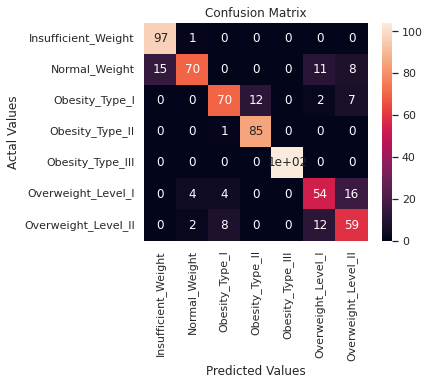

In [366]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [367]:
from sklearn.metrics import recall_score, accuracy_score, precision_score
print("Recall Score is : ",recall_score(y_test, y_pred_lg, pos_label='positive', average='weighted'))
print("Accuracy Score is : ",accuracy_score(y_test, y_pred_lg))
print("precision Score is : ",precision_score(y_test, y_pred_lg, pos_label='positive', average='weighted'))

Recall Score is :  0.839563862928349
Accuracy Score is :  0.839563862928349
precision Score is :  0.8441506587783992


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [368]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        98
           1       0.91      0.67      0.77       104
           2       0.84      0.77      0.80        91
           3       0.88      0.99      0.93        86
           4       1.00      1.00      1.00       104
           5       0.68      0.69      0.69        78
           6       0.66      0.73      0.69        81

    accuracy                           0.84       642
   macro avg       0.83      0.83      0.83       642
weighted avg       0.84      0.84      0.84       642



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


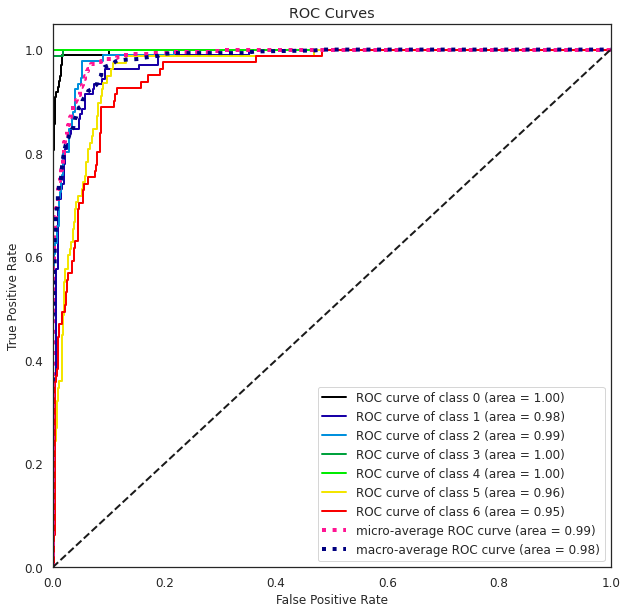

In [369]:
# class probs
y_pred_prob0 = logreg_CV.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_prob0,figsize=(10,10))
plt.show()

# ----------------------------------------------------------------------
SVC

In [370]:
from sklearn.svm import SVC, LinearSVC, SVR

In [382]:
svc = SVC(probability=True)

In [383]:
svc_CV = GridSearchCV(svc, param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                            'tol': [1e-3]}, cv=cv, verbose=False)

In [384]:
svc_CV.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.33,
            train_size=None),
             estimator=SVC(probability=True),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'tol': [0.001]},
             verbose=False)

In [385]:
print(svc_CV.best_params_)

{'kernel': 'linear', 'tol': 0.001}


In [386]:
y_pred_svc = svc_CV.predict(X_test)

In [387]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_df1 = pd.DataFrame(cm_svc,
                     index = ['Insufficient_Weight', 'Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II'], 
                     columns = ['Insufficient_Weight', 'Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II'])

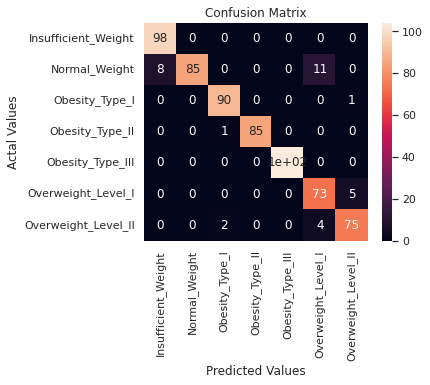

In [388]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df1, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [389]:
from sklearn.metrics import recall_score, accuracy_score, precision_score
print("Accuracy Score is : ",accuracy_score(y_test, y_pred_svc))
print("Recall Score is : ",recall_score(y_test, y_pred_svc, pos_label='positive', average='weighted'))
print("precision Score is : ",precision_score(y_test, y_pred_svc, pos_label='positive', average='weighted'))

Accuracy Score is :  0.9501557632398754
Recall Score is :  0.9501557632398754
precision Score is :  0.9538517681752079


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [390]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        98
           1       1.00      0.82      0.90       104
           2       0.97      0.99      0.98        91
           3       1.00      0.99      0.99        86
           4       1.00      1.00      1.00       104
           5       0.83      0.94      0.88        78
           6       0.93      0.93      0.93        81

    accuracy                           0.95       642
   macro avg       0.95      0.95      0.95       642
weighted avg       0.95      0.95      0.95       642



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


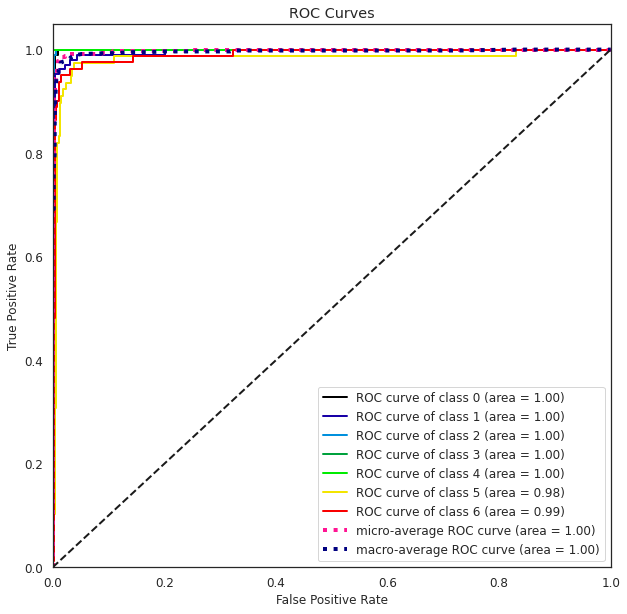

In [391]:
# class probs
y_pred_prob1 = svc_CV.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_prob1,figsize=(10,10))
plt.show()

# ---------------------------------------------------------------------
Decision Tree


In [392]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [393]:
dt = DecisionTreeClassifier()
param_grid = {'min_samples_leaf': [i for i in range(2,20)]}

In [394]:
dt_CV = GridSearchCV(dt, param_grid=param_grid, cv=cv, verbose=False)

In [395]:
dt_CV.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.33,
            train_size=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=False)

In [396]:
print(dt_CV.best_params_)

{'min_samples_leaf': 8}


In [397]:
y_pred_dt = dt_CV.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_df2 = pd.DataFrame(cm_dt,
                     index = ['Insufficient_Weight', 'Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II'], 
                     columns = ['Insufficient_Weight', 'Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II'])

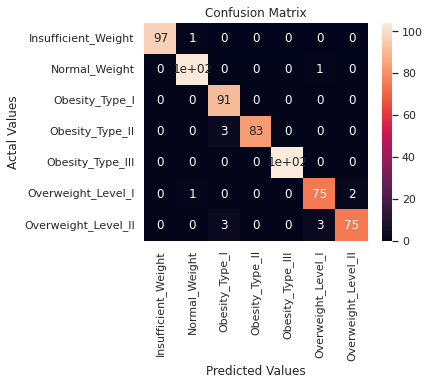

In [398]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df2, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [399]:
from sklearn.metrics import recall_score, accuracy_score, precision_score
print("Accuracy Score is : ",accuracy_score(y_test, y_pred_dt))
print("Recall Score is : ",recall_score(y_test, y_pred_dt, pos_label='positive', average='weighted'))
print("precision Score is : ",precision_score(y_test, y_pred_dt, pos_label='positive', average='weighted'))

Accuracy Score is :  0.9781931464174455
Recall Score is :  0.9781931464174455
precision Score is :  0.9787179415064836


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [400]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       0.98      0.99      0.99       104
           2       0.94      1.00      0.97        91
           3       1.00      0.97      0.98        86
           4       1.00      1.00      1.00       104
           5       0.95      0.96      0.96        78
           6       0.97      0.93      0.95        81

    accuracy                           0.98       642
   macro avg       0.98      0.98      0.98       642
weighted avg       0.98      0.98      0.98       642



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


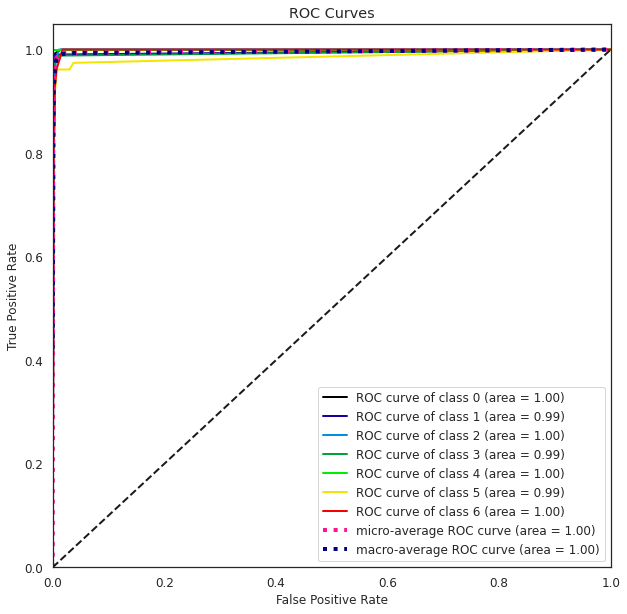

In [401]:
# class probs
y_pred_prob2 = dt_CV.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_prob2,figsize=(10,10))
plt.show()

# --------------------------------------------------------------------
XGBoost

In [402]:
import xgboost as xgb
from xgboost import XGBClassifier

In [403]:
xgb = xgb.XGBClassifier()

In [404]:
param_grid = {'n_estimators': [50, 60, 70, 80, 90], 
              'learning_rate': [0.09, 0.1, 0.15, 0.2],
              'max_depth': [3, 4, 5]}

In [405]:
xgb_CV = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=cv)

In [406]:
xgb_CV.fit(X_train, y_train)

y_pred_xgb = xgb_CV.predict(X_test)

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_df3 = pd.DataFrame(cm_xgb,
                     index = ['Insufficient_Weight', 'Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II'], 
                     columns = ['Insufficient_Weight', 'Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II'])

In [407]:
print(xgb_CV.best_params_)

{'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 70}


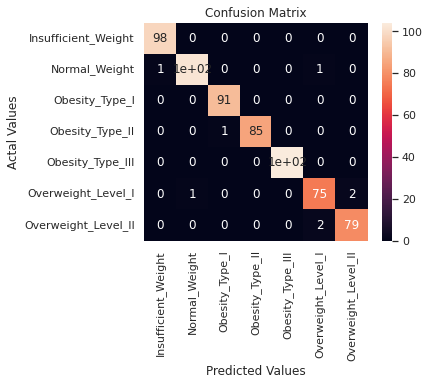

In [408]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df3, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [409]:
from sklearn.metrics import recall_score, accuracy_score, precision_score
print("Accuracy Score is : ",accuracy_score(y_test, y_pred_xgb))
print("Recall Score is : ",recall_score(y_test, y_pred_xgb, pos_label='positive', average='weighted'))
print("precision Score is : ",precision_score(y_test, y_pred_xgb, pos_label='positive', average='weighted'))

Accuracy Score is :  0.9875389408099688
Recall Score is :  0.9875389408099688
precision Score is :  0.9875564826128571


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [410]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        98
           1       0.99      0.98      0.99       104
           2       0.99      1.00      0.99        91
           3       1.00      0.99      0.99        86
           4       1.00      1.00      1.00       104
           5       0.96      0.96      0.96        78
           6       0.98      0.98      0.98        81

    accuracy                           0.99       642
   macro avg       0.99      0.99      0.99       642
weighted avg       0.99      0.99      0.99       642



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


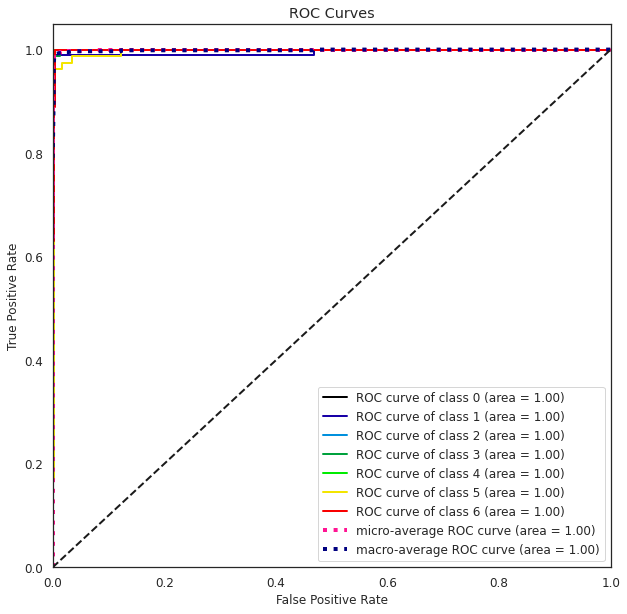

In [411]:
# class probs
y_pred_prob3 = xgb_CV.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_prob3,figsize=(10,10))
plt.show()

# ----------------------------------------------------------------------------
GaussianProcessClassification

In [412]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel

In [413]:
grid = dict()
grid['kernel'] = [1*RBF(), 1*DotProduct(), 1*Matern(),  1*RationalQuadratic(), 1*WhiteKernel()]

In [414]:
gpc = GaussianProcessClassifier()

In [415]:
param_grid = {'max_iter_predict': [70, 80, 90],
              'warm_start': [False],
              'n_restarts_optimizer': range(2,4)
              }

In [416]:
gpc_CV = GridSearchCV(estimator=gpc, param_grid=grid, cv=cv, verbose=False)

In [417]:
results= gpc_CV.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernel

In [418]:
print(gpc_CV.best_params_)

{'kernel': 1**2 * RationalQuadratic(alpha=1, length_scale=1)}


In [419]:
y_pred_gpc = gpc_CV.predict(X_test)

In [420]:
cm_gpc = confusion_matrix(y_test, y_pred_gpc)
cm_df4 = pd.DataFrame(cm_gpc,
                     index = ['Insufficient_Weight', 'Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II'], 
                     columns = ['Insufficient_Weight', 'Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II'])

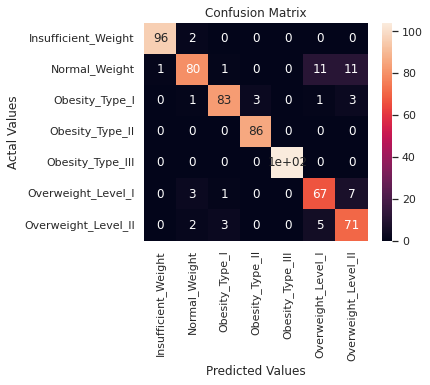

In [421]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df4, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [422]:
from sklearn.metrics import recall_score, accuracy_score, precision_score
print("Accuracy Score is : ",accuracy_score(y_test, y_pred_gpc))
print("Recall Score is : ",recall_score(y_test, y_pred_gpc, pos_label='positive', average='weighted'))
print("precision Score is : ",precision_score(y_test, y_pred_gpc, pos_label='positive', average='weighted'))

Accuracy Score is :  0.9143302180685359
Recall Score is :  0.9143302180685359
precision Score is :  0.9177429432969754


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [423]:
print(classification_report(y_test, y_pred_gpc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        98
           1       0.91      0.77      0.83       104
           2       0.94      0.91      0.93        91
           3       0.97      1.00      0.98        86
           4       1.00      1.00      1.00       104
           5       0.80      0.86      0.83        78
           6       0.77      0.88      0.82        81

    accuracy                           0.91       642
   macro avg       0.91      0.91      0.91       642
weighted avg       0.92      0.91      0.91       642



In [424]:
# class probs
y_pred_prob = gpc_CV.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


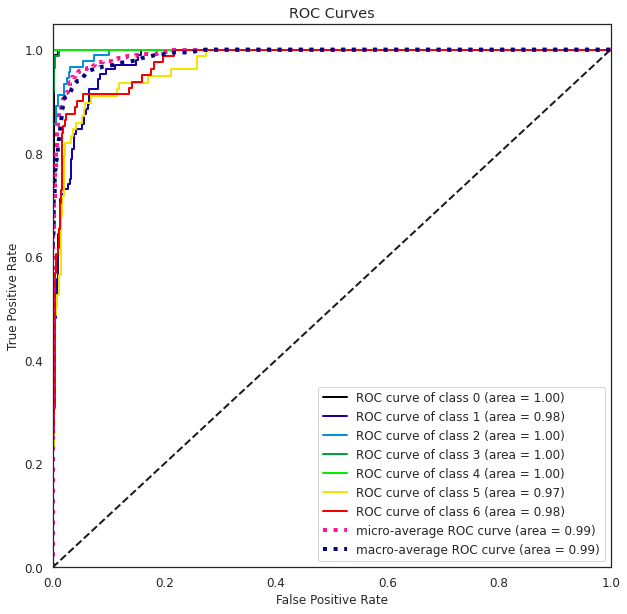

In [425]:
skplt.metrics.plot_roc_curve(y_test, y_pred_prob,figsize=(10,10))
plt.show()

In [426]:
from sklearn.decomposition import PCA

In [427]:
X

Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
4          1  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       0  20.976842  1.710730  131.408528                               1   
2107       0  21.982942  1.748584  133.742943                               1   
2108       0  22.524036  1.752206  133.689352                               1   
2109       0  24.361936  1.739450  133.346641                               1   
2110       0  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0        0   2.0  3.0     2      0  2.000000    0  0.000000  1.000000     3   
1        0   3.0  3.0     2      1  3.000000    1  3.000000  0.000000     2   
2        0   2.0  3.0     2      0  2.000000    0  2.000000  1.000000     1   
3        0   3.0  3.0     2      0  2.000000    0  2.000000  0.000000     1   
4        0   2.0  1.0     2      0  2.000000    0  0.000000  0.000000     2   
...    ...   ...  ...   ...    ...       ...  ...       ...       ...   ...   
2106     1   3.0  3.0     2      0  1.728139    0  1.676269  0.906247     2   
2107     1   3.0  3.0     2      0  2.005130    0  1.341390  0.599270     2   
2108     1   3.0  3.0     2      0  2.054193    0  1.414209  0.646288     2   
2109     1   3.0  3.0     2      0  2.852339    0  1.139107  0.586035     2   
2110     1   3.0  3.0     2      0  2.863513    0  1.026452  0.714137     2   

      MTRANS        BMI  
0          3  24.386526  
1          3  24.238227  
2          3  23.765432  
3          4  26.851852  
4          3  28.342381  
...      ...        ...  
2106       3  44.901475  
2107       3  43.741923  
2108       3  43.543817  
2109       3  44.071535  
2110       3  44.144338  

[1943 rows x 17 columns]

In [428]:
y

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 1943, dtype: int64

In [429]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[-1.03084077, -0.45177825, -0.92342663, ...,  1.44324446,
         0.40172072, -0.630659  ],
       [-1.03084077, -0.45177825, -2.00639743, ..., -0.53156116,
         0.40172072, -0.64863334],
       [ 0.97008192,  0.01287936,  1.02592082, ..., -2.50636678,
         0.40172072, -0.70593757],
       ...,
       [-1.03084077, -0.09770079,  0.50832576, ..., -0.53156116,
         0.40172072,  1.69126437],
       [-1.03084077,  0.32929632,  0.370182  , ..., -0.53156116,
         0.40172072,  1.75522554],
       [-1.03084077,  0.16731041,  0.36353256, ..., -0.53156116,
         0.40172072,  1.76404943]])

In [430]:
gpc = GaussianProcessClassifier(kernel=1*Matern())

In [453]:
pca = PCA()
x_pca = pca.fit_transform(x_scaled)
x_pca.shape

(1943, 17)

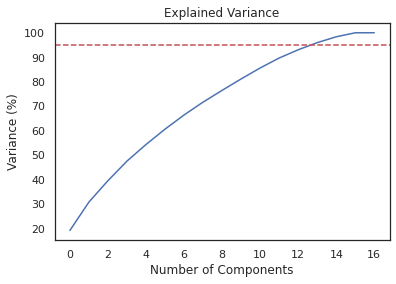

In [454]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 95% variance
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

In [431]:
pca = PCA(12)
x_pca = pca.fit_transform(X)
x_pca.shape

(1943, 12)

In [447]:
import numpy as np

In [432]:
pca.explained_variance_ratio_

array([9.65250606e-01, 2.06647213e-02, 9.25930224e-03, 1.14704125e-03,
       8.00081045e-04, 6.64471239e-04, 4.59668459e-04, 4.24854391e-04,
       3.56738199e-04, 2.86482860e-04, 2.16370230e-04, 1.58134289e-04])

In [433]:
pca.n_components_

12

In [434]:
x_pca

array([[-2.32729622e+01, -6.70675417e-01, -1.56407582e+00, ...,
        -7.00107840e-01, -1.41869015e-01, -4.83505197e-01],
       [-3.09765232e+01, -2.14322387e-01, -3.24986192e+00, ...,
         4.05917649e-01,  4.02894726e-02,  1.42258861e-01],
       [-1.08750147e+01,  3.27350229e-01,  3.02933219e+00, ...,
         1.24784622e+00,  1.17634870e-01,  3.27657951e-01],
       ...,
       [ 4.89770045e+01, -3.01580845e+00, -4.45342336e-01, ...,
         1.44013457e-01, -1.83204616e-02, -3.39416505e-01],
       [ 4.88965159e+01, -1.15246281e+00, -9.40891327e-01, ...,
        -2.46338764e-02,  9.36344474e-02, -3.26176226e-01],
       [ 4.90013086e+01, -1.84548132e+00, -1.02725105e+00, ...,
        -3.99497259e-02,  8.26279808e-02, -3.09121433e-01]])

In [435]:
#train test split function
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(x_pca, y,test_size = .33, random_state=0)

In [436]:
grid = dict()
grid['kernel'] = [ 1*Matern()]
grid['max_iter_predict'] = [70, 80, 90]
grid['warm_start'] = [False]
grid['n_restarts_optimizer'] = range(2,4)

In [437]:
gpc_CV = GridSearchCV(estimator=gpc, param_grid=grid, cv=cv, verbose=False)
results= gpc_CV.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpc.py:472: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.7/dist-p

In [438]:
print(gpc_CV.best_params_)

{'kernel': 1**2 * Matern(length_scale=1, nu=1.5), 'max_iter_predict': 70, 'n_restarts_optimizer': 2, 'warm_start': False}


In [439]:
y_pred_gpc = gpc_CV.predict(X_test)

In [440]:
cm_gpcc = confusion_matrix(y_test, y_pred_gpc)
cm_df5 = pd.DataFrame(cm_gpcc,
                     index = ['Insufficient_Weight', 'Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II'], 
                     columns = ['Insufficient_Weight', 'Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II'])

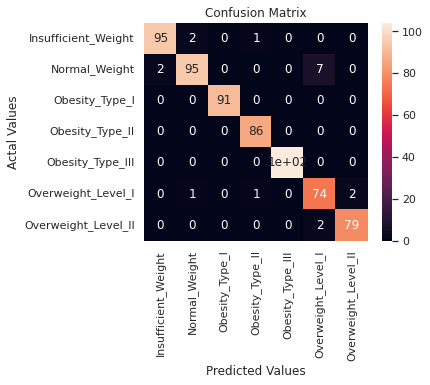

In [441]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df5, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [442]:
from sklearn.metrics import recall_score, accuracy_score, precision_score
print("Accuracy Score is : ",accuracy_score(y_test, y_pred_gpc))
print("Recall Score is : ",recall_score(y_test, y_pred_gpc, pos_label='positive', average='weighted'))
print("precision Score is : ",precision_score(y_test, y_pred_gpc, pos_label='positive', average='weighted'))

Accuracy Score is :  0.9719626168224299
Recall Score is :  0.9719626168224299
precision Score is :  0.9725597059097579


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [443]:
print(classification_report(y_test, y_pred_gpc))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        98
           1       0.97      0.91      0.94       104
           2       1.00      1.00      1.00        91
           3       0.98      1.00      0.99        86
           4       1.00      1.00      1.00       104
           5       0.89      0.95      0.92        78
           6       0.98      0.98      0.98        81

    accuracy                           0.97       642
   macro avg       0.97      0.97      0.97       642
weighted avg       0.97      0.97      0.97       642



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


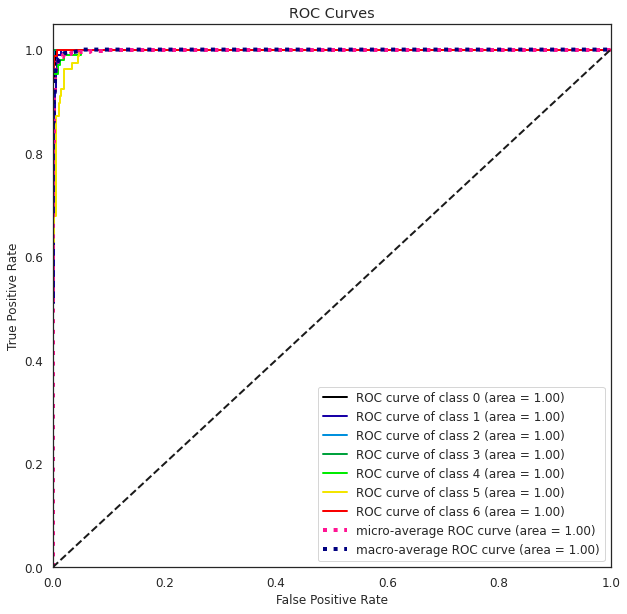

In [444]:
# class probs
y_pred_prob_ = gpc_CV.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_prob_,figsize=(10,10))
plt.show()